In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('Advertising.csv')

In [46]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


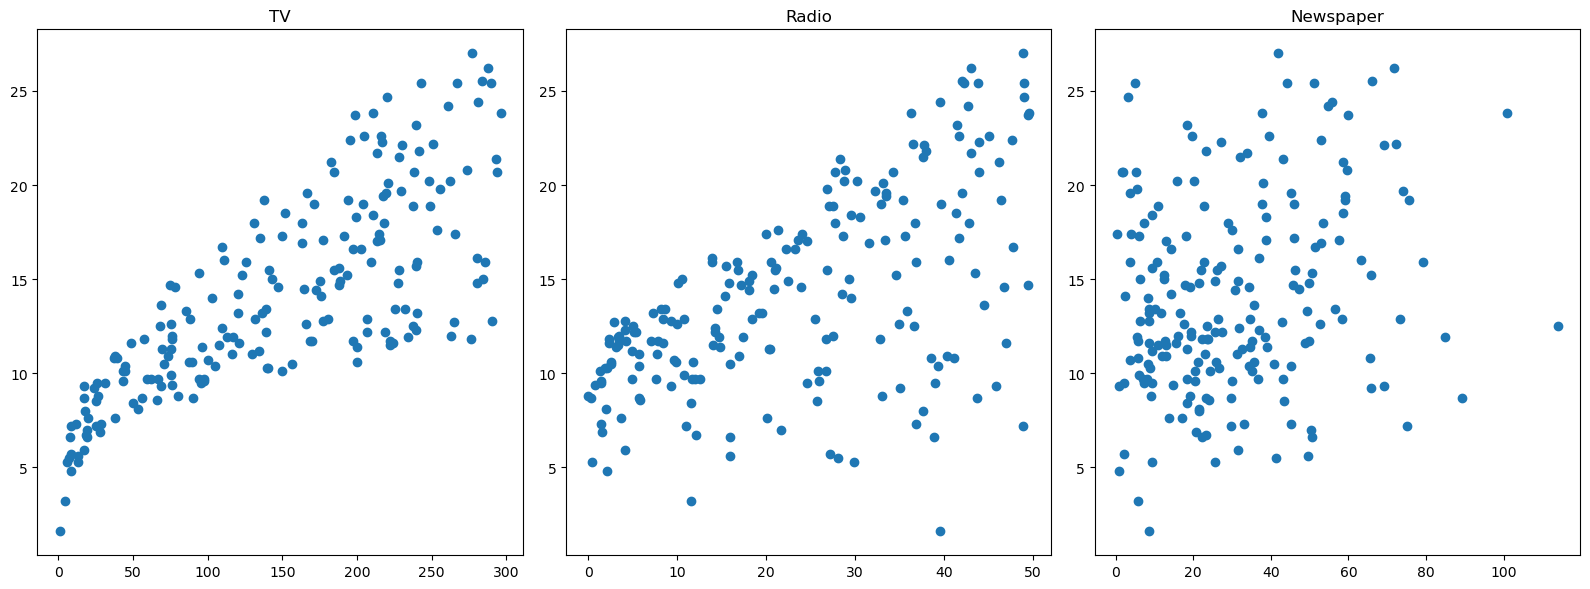

In [47]:
fig , axes = plt.subplots(nrows = 1,ncols = 3, figsize = (16,6))
axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_title('TV')
axes[1].set_title('Radio')
axes[2].set_title('Newspaper')
axes[1].plot(df['radio'],df['sales'],'o')
axes[2].plot(df['newspaper'],df['sales'],'o')
# axes[0].plot(df['TV'],df['sales'],'o')
plt.tight_layout()

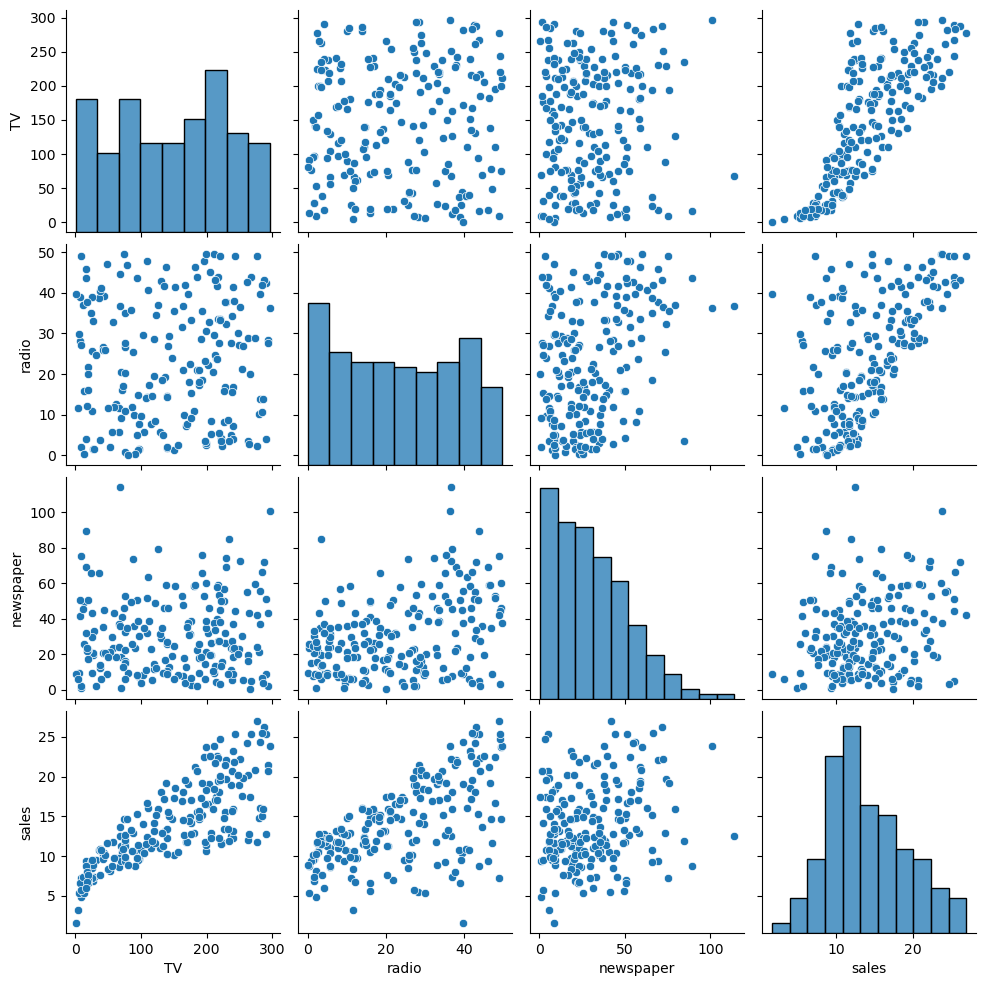

In [48]:
sns.pairplot(df)

In [49]:
X = df.drop('sales',axis = 1)

In [50]:
y = df['sales']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size  = 0.333, random_state= 42)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression()

In [57]:
model.fit(X_train,y_train)

LinearRegression()

In [58]:
testpred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [15]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

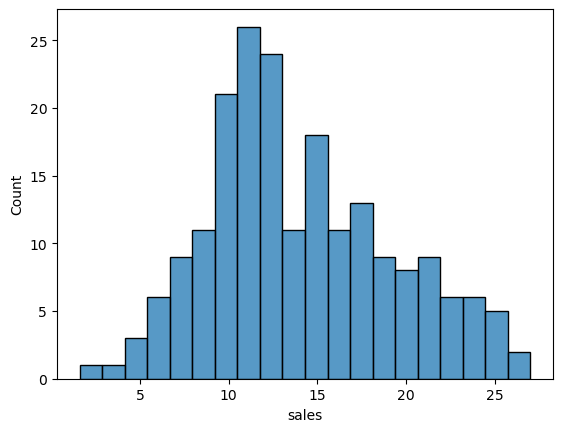

In [16]:
sns.histplot(data =  df['sales'],bins = 20)

In [17]:
mean_absolute_error(y_test,testpred)
# MAE

1.4786667721660571

In [18]:
mean_squared_error(y_test,testpred)
# MSE

3.6691358630133775

In [19]:
np.sqrt(mean_squared_error(y_test,testpred))
# RMSE

1.9154988548713303

In [20]:
testres = y_test - testpred

In [21]:
testres

95     0.315236
15     1.208796
30    -0.282462
158   -3.497430
128    2.419197
         ...   
31     0.447817
12    -1.901878
35    -3.823889
119   -0.298426
42    -0.661553
Name: sales, Length: 67, dtype: float64

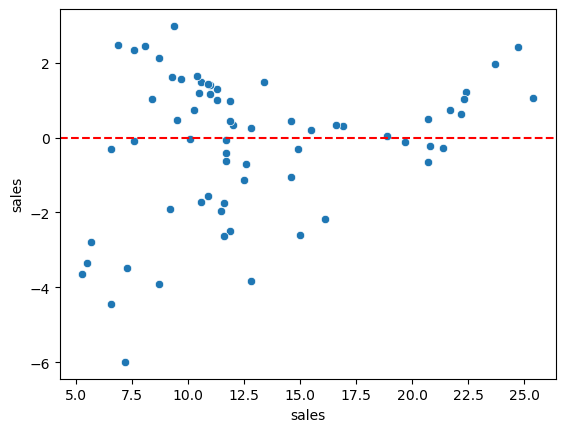

In [22]:
sns.scatterplot(x = y_test, y = testres)
plt.axhline(y = 0, color = 'r' , ls = '--')

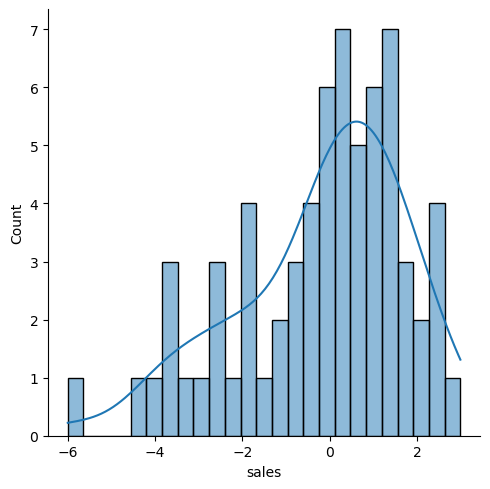

In [23]:
sns.displot(testres , bins = 25, kde = True)

In [24]:
import scipy as sp

((array([-2.3155235 , -1.96037689, -1.75277426, -1.60121291, -1.47945489,
         -1.37636782, -1.28613259, -1.20530443, -1.13166617, -1.06370178,
         -1.00032589, -0.94073275, -0.88430639, -0.83056423, -0.7791203 ,
         -0.72966029, -0.68192422, -0.63569402, -0.59078441, -0.54703616,
         -0.50431093, -0.4624873 , -0.42145767, -0.38112577, -0.34140471,
         -0.3022153 , -0.26348479, -0.22514567, -0.18713478, -0.14939245,
         -0.11186181, -0.07448813, -0.03721824,  0.        ,  0.03721824,
          0.07448813,  0.11186181,  0.14939245,  0.18713478,  0.22514567,
          0.26348479,  0.3022153 ,  0.34140471,  0.38112577,  0.42145767,
          0.4624873 ,  0.50431093,  0.54703616,  0.59078441,  0.63569402,
          0.68192422,  0.72966029,  0.7791203 ,  0.83056423,  0.88430639,
          0.94073275,  1.00032589,  1.06370178,  1.13166617,  1.20530443,
          1.28613259,  1.37636782,  1.47945489,  1.60121291,  1.75277426,
          1.96037689,  2.3155235 ]),
 

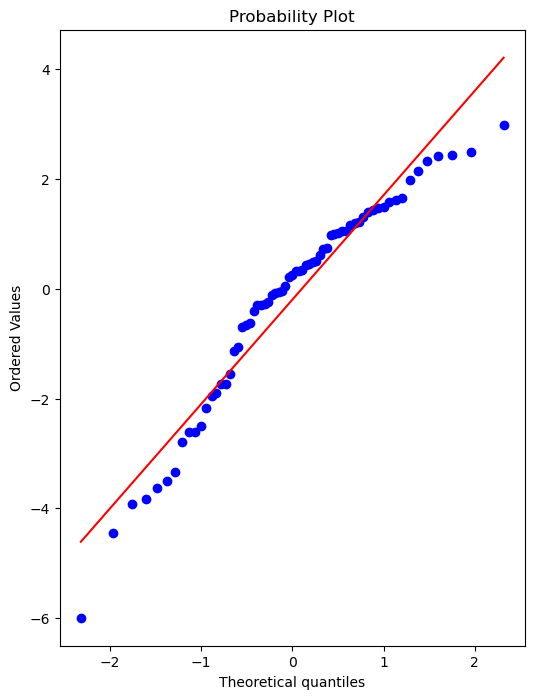

In [25]:
fig , ax =plt.subplots(figsize = (6,8) , dpi = 100)
sp.stats.probplot(testres, plot = ax)

In [27]:
final_model = LinearRegression()

In [28]:
final_model.fit(X,y)

LinearRegression()

In [29]:
final_model

LinearRegression()

In [30]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [31]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [32]:
y_hat = final_model.predict(X)

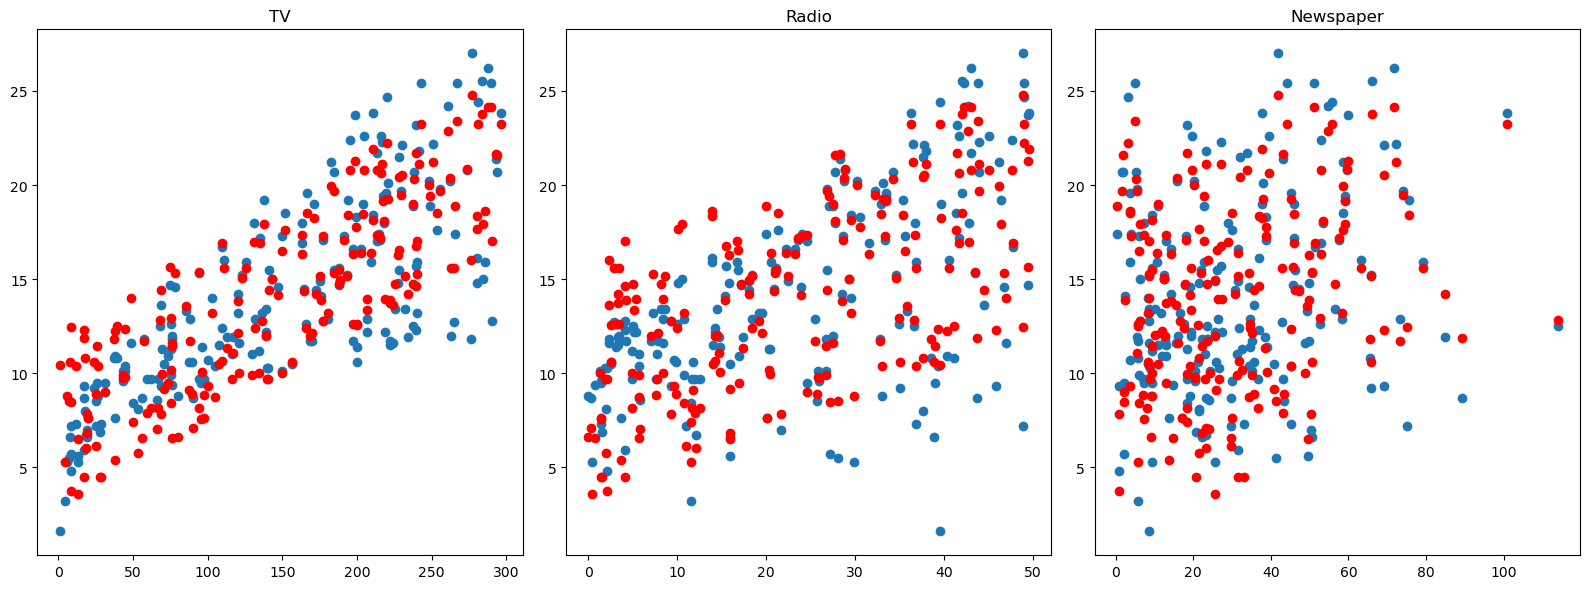

In [34]:
fig , axes = plt.subplots(nrows = 1,ncols = 3, figsize = (16,6))
axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color = 'red')

axes[0].set_title('TV')
axes[1].set_title('Radio')
axes[2].set_title('Newspaper')
axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color = 'red')
axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color = 'red')
# axes[0].plot(df['TV'],df['sales'],'o')
plt.tight_layout()

In [35]:
from joblib import dump , load

In [36]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [37]:
loaded_model = load('final_sales_model.joblib')

In [38]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [39]:
X.shape

(200, 3)

In [42]:
campaign= [[149,22,12]]

In [43]:
loaded_model.predict(campaign)

C:\Users\kanis\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])